In [7]:
import pandas as pd

# Data organized as a dictionary
data = {
    'Model': [
        'U-Net (ResNet18)', 
        'DeepLabV3+ (ResNet18)', 
        'SegFormer (MiT-B0)', 
        'ResNet-18 (HazardCNN)'
    ],
    'F1 Score': [0.77254079, 0.76374133, 0.76060474, 0.78477589],
    'Precision': [0.71226676, 0.70177034, 0.69804050, 0.73813331],
    'Recall': [0.84395898, 0.83771734, 0.83548818, 0.84083816],
    'Accuracy': [84.395898, 83.771734, 83.548818, 84.083816],
    'Loss Function': [
        'HazardCNNFocalLoss', 
        'DeepLabFocalLoss', 
        'SegFormerCrossEntropyLoss', 
        'HazardCNNFocalLoss'
    ]
}

# Create the DataFrame from the dictionary
df_from_dict = pd.DataFrame(data)

# Display the DataFrame
print(df_from_dict)


                   Model  F1 Score  Precision    Recall   Accuracy  \
0       U-Net (ResNet18)  0.772541   0.712267  0.843959  84.395898   
1  DeepLabV3+ (ResNet18)  0.763741   0.701770  0.837717  83.771734   
2     SegFormer (MiT-B0)  0.760605   0.698040  0.835488  83.548818   
3  ResNet-18 (HazardCNN)  0.784776   0.738133  0.840838  84.083816   

               Loss Function  
0         HazardCNNFocalLoss  
1           DeepLabFocalLoss  
2  SegFormerCrossEntropyLoss  
3         HazardCNNFocalLoss  


📊 Normalizing Accuracy from percentage to [0,1] scale.

🎯 Highlighting 'ResNet-18 (HazardCNN)' as the best model (F1 Score: 0.7848).


IndexError: list index out of range

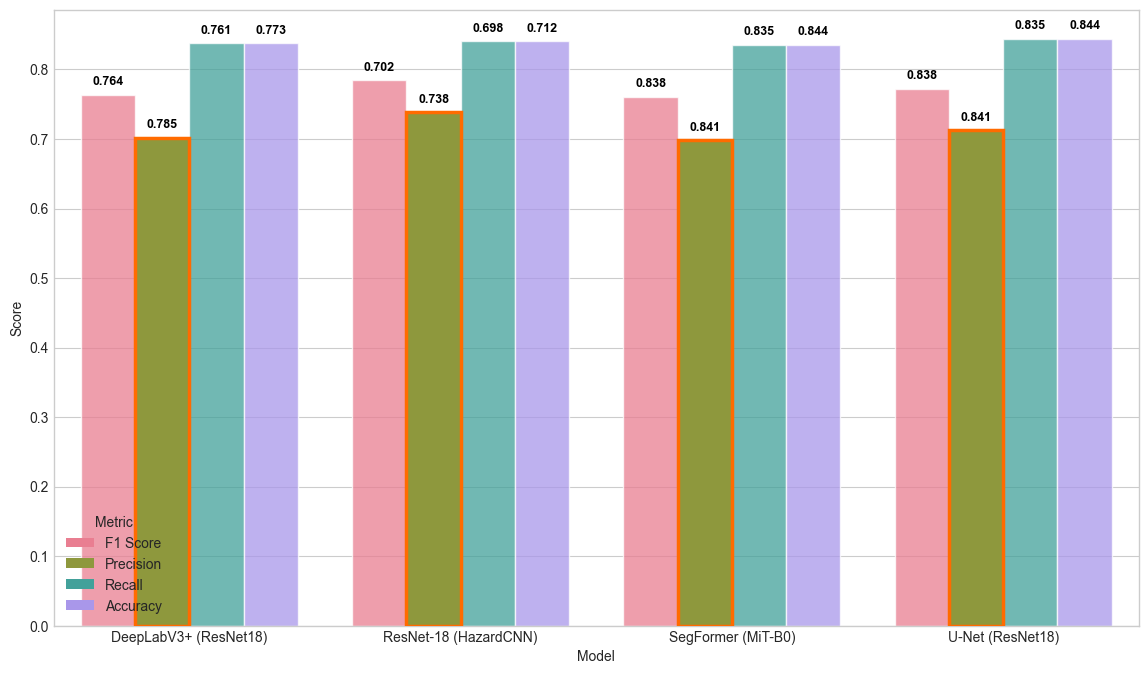

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from matplotlib.patches import Patch
from matplotlib import font_manager
from pathlib import Path  # Keep for saving the output plot

# --- 1. Define the DataFrame directly in the code ---
# This replaces the need to read from a CSV file.
data = {
    'Model': [
        'U-Net (ResNet18)',
        'DeepLabV3+ (ResNet18)',
        'SegFormer (MiT-B0)',
        'ResNet-18 (HazardCNN)'
    ],
    'F1 Score': [0.77254079, 0.76374133, 0.76060474, 0.78477589],
    'Precision': [0.71226676, 0.70177034, 0.69804050, 0.73813331],
    'Recall': [0.84395898, 0.83771734, 0.83548818, 0.84083816],
    'Accuracy': [84.395898, 83.771734, 83.548818, 84.083816],
    'Loss Function': [
        'HazardCNNFocalLoss',
        'DeepLabFocalLoss',
        'SegFormerCrossEntropyLoss',
        'HazardCNNFocalLoss'
    ]
}
df_from_dict = pd.DataFrame(data)


# Filter out specific Matplotlib warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")


# --- 2. Refactor the function to accept a DataFrame ---
def visualize_and_highlight_results(results_df: pd.DataFrame):
    """
    Generates a comparison plot from a DataFrame of model results.

    Args:
        results_df (pd.DataFrame): DataFrame containing model performance
                                   metrics with columns like 'Model', 'F1 Score', etc.
    """
    # --- Data Preparation ---
    # Normalize Accuracy if it's in percentage format
    if 'Accuracy' in results_df.columns and results_df['Accuracy'].max() > 1:
        print("📊 Normalizing Accuracy from percentage to [0,1] scale.")
        results_df['Accuracy'] = results_df['Accuracy'] / 100.0

    metrics_to_plot = ["F1 Score", "Precision", "Recall", "Accuracy"]
    df_melted = results_df.melt(id_vars=['Model'], value_vars=metrics_to_plot,
                               var_name='Metric', value_name='Score')

    # --- Find the Best Model for Highlighting ---
    best_model_name = results_df.loc[results_df['F1 Score'].idxmax()]['Model']
    best_f1_score = results_df['F1 Score'].max()
    print(f"\n🎯 Highlighting '{best_model_name}' as the best model (F1 Score: {best_f1_score:.4f}).")

    # --- Plot Creation ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(14, 8))
    palette = sns.color_palette("husl", n_colors=len(metrics_to_plot))

    # Define a consistent model order and pass it to Seaborn for robust plotting
    model_order = sorted(results_df['Model'].unique())
    sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted,
                palette=palette, ax=ax, saturation=0.8, order=model_order)

    # --- Add Data Labels and Highlights ---
    n_models = len(model_order)
    n_metrics = len(metrics_to_plot)

    for i, bar in enumerate(ax.patches):
        model_idx = i // n_metrics
        metric_idx = i % n_metrics
        model_name = model_order[model_idx]
        metric_name = metrics_to_plot[metric_idx]
        actual_value = results_df[results_df['Model'] == model_name][metric_name].values[0]

        # Add value labels to each bar
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{actual_value:.3f}',
                ha='center', va='bottom', fontsize=9, color='black', weight='bold')

        # Highlight the best performing model
        if model_name == best_model_name:
            bar.set_edgecolor('#FF6B00')
            bar.set_linewidth(2.5)
            bar.set_zorder(3)
        else:
            bar.set_edgecolor('white')
            bar.set_linewidth(1)
            bar.set_alpha(0.75)
            bar.set_zorder(2)

    # --- Comprehensive Plot Styling ---
    ax.set_title('Deep Learning Model Performance Comparison', fontsize=16, fontweight='bold', pad=25)
    ax.set_xlabel('Model Architecture', fontsize=12, labelpad=15)
    ax.set_ylabel('Performance Score', fontsize=12, labelpad=15)
    ax.set_ylim(0, max(1.0, df_melted['Score'].max() * 1.15))
    plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
    ax.legend(title='Metrics', bbox_to_anchor=(1.02, 1), loc='upper left')

    # --- Add Informational Text Box with Emoji Support ---
    try:
        emoji_font = font_manager.FontProperties(family='Segoe UI Emoji', size=12)
        summary_text = f"🏆 Best Model: {best_model_name}\nF1-Score: {best_f1_score:.4f}"
        ax.text(0.02, 0.98, summary_text, transform=ax.transAxes, va='top',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='gold', alpha=0.8),
                fontproperties=emoji_font, weight='bold')
    except RuntimeError:
        print("Emoji font not found. Skipping trophy icon.")
        summary_text = f"Best Model: {best_model_name}\nF1-Score: {best_f1_score:.4f}"
        ax.text(0.02, 0.98, summary_text, transform=ax.transAxes, va='top',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='gold', alpha=0.8), weight='bold')


    # --- Layout Management & Saving ---
    fig.set_constrained_layout(True)
    
    # Define a simple output path
    output_path = Path("model_performance_comparison.png")
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    
    print(f"\n✅ Comparison chart saved to: {output_path}")
    plt.show()


# --- 3. Run the visualization by passing the DataFrame ---
visualize_and_highlight_results(df_from_dict)
